# Final Project

Pablo Rivera <br>
Beltrán Zamorano

Quick note: due to practical and time related reasons, most of the code was made by Pablo since he already knew how to program, however, this does not mean Beltrán was on the sideline, he helped developing the questions and conclusion of the work. Both team member assumed different roles but we both contributed in some part to this project.

## Introduction

For this project, we are going to be using the College Tuition, Diversity, and Pay dataset displayed below. Based on the variables (columns) of the dataset, we want to answer the following two main questions: 

- Is university worth it as an investment?
- Will it be worth it in the future?

The first question aims to see if paying for a degree is worth it or not, in other words, we want to analyze if the investment (cost of the degree) is recovered and what is the total return of the investment. In order to help answer this question, we will to compare the potential earnings of people who didn't attend to university against the ones who did. The second question will be answered through a regression model, we suspect that tuition fees have been growing rapidly while salaries have not (we will analyze this), if this trend is true and it continues university may not be worth it in a couple of years.

Secondary questions will be answered to complete and help answer the main questions, some of them are the following:

- Are tuitions getting too high? Are they growing exponentially?
- Are salaries growing at the same rate as tuitions?
- Is there a difference between private and public universities? (average tuition and salary per type)
- Does the rank of the university matter when it comes to potential salary?
- Studying in a high tuition university grants you a high salary?
- Is there a relation between the tuition and the rank of the university?

- What is the percentage of students that pay the full tuition or have no scholarship? 
- Does income affect the scholarship rate?

- Are there significant benefits in doing a 4-year degree instead of a 2-year degree? What are the differences?

With all of this information we will be able to conclude and answer the main questions as well as provide a detailed analysis of the dataset that could give us even more information unknown to us at this stage.

## Packages required

In [1]:
### Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

In [2]:

### Function made on a personal project in my home university in México
def dqr(data):
    #Lista de variables (features) de la de datos
    columns = pd.DataFrame(list(data.columns.values),columns=['Nombres'], index=list(data.columns.values))

    #Lista de tipos de datos
    data_types=pd.DataFrame(data.dtypes, columns=['Data_Types'])

    #Lista de datos perdidos (missing data)
    missing_values=pd.DataFrame(data.isnull().sum(),columns=['missing_values'])

    #Lista de los datos presentes
    present_values=pd.DataFrame(data.count(),columns=['present_values'])

    #Lista de valores únicos
    unique_values=pd.DataFrame(columns=['unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col]=[data[col].nunique()]

    #Lista de valores mínimos
    min_values = pd.DataFrame(columns=['min'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col]=[data[col].min()]
        except:
            pass

    #Lista de valores mínimos
    max_values = pd.DataFrame(columns=['max'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col]=[data[col].max()]
        except:
            pass
        
    #Regresar el reporte con la union de todos los dataframes
    return columns.join(data_types).join(missing_values).join(present_values).join(unique_values).join(min_values).join(max_values)



## Data Cleaning and Preparation

In [3]:
### Importing datasets needed for the analysis

tuition_cost_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')
tuition_income_data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv")
salary_potential_data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv")
historical_tuition_data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv")


### Dataset #1: Tuition Cost

In [4]:
### Overview of the first dataset

tuition_cost_data.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [5]:
### Data Quality Report of the first dataset

dqr(tuition_cost_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
name,name,object,0,2973,2938,ASA College,Zane State College
state,state,object,52,2921,50,NaN,NaN
state_code,state_code,object,0,2973,55,AK,WY
type,type,object,0,2973,4,For Profit,Public
degree_length,degree_length,object,0,2973,3,2 Year,Other
room_and_board,room_and_board,float64,1094,1879,1428,30.0,21300.0
in_state_tuition,in_state_tuition,int64,0,2973,2373,480,59985
in_state_total,in_state_total,int64,0,2973,2560,962,75003
out_of_state_tuition,out_of_state_tuition,int64,0,2973,2491,480,59985
out_of_state_total,out_of_state_total,int64,0,2973,2628,1376,75003


The data quality report of this first dataset shows that it is relatively clean, there are no significant errors or out of the ordinary things in the dataset. However, we can see that there are some columns with some missing values, we will first try and clean the column "state" and see what are the missing values, and then we will work on the "room_and_board" column.

In [6]:
# Rows that have NaN on the "state" column

tuition_cost_data[tuition_cost_data["state"].isnull()]

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
61,American Samoa Community College,NaN,AS,Public,2 Year,NaN,3700,3700,3700,3700
62,American University,NaN,DC,Private,4 Year,14880.0,48459,63339,48459,63339
63,American University of Puerto Rico,NaN,PR,Private,4 Year,NaN,6946,6946,6946,6946
124,Atlantic University College,NaN,PR,Private,4 Year,NaN,4525,4525,4525,4525
169,Bayamon Central University,NaN,PR,Private,4 Year,NaN,5775,5775,5775,5775
349,Caribbean University,NaN,PR,Private,4 Year,NaN,6570,6570,6570,6570
354,Carlos Albizu University: San Juan,NaN,PR,Private,4 Year,NaN,5912,5912,5912,5912
372,Catholic University of America,NaN,DC,Private,4 Year,14650.0,45804,60454,45804,60454
576,Columbia Central University: Yauco,NaN,PR,For Profit,2 Year,NaN,6420,6420,6420,6420
618,Conservatory of Music of Puerto Rico,NaN,PR,Public,4 Year,NaN,4000,4000,4000,4000


We can see that, along with the state, we have a state code. This state code, along with the name of the university, can give us a clue on where they are located.

In [7]:
### We get the state code of the missing states to see what they are

missing_states = tuition_cost_data[tuition_cost_data["state"].isnull()].iloc[:,2].unique()
missing_states

array(['AS', 'DC', 'PR', 'GU', 'VI'], dtype=object)

In [8]:
# We get the first university of each missing state code to check where they are from

missing_states_uni = pd.DataFrame([tuition_cost_data[tuition_cost_data["state_code"] == missing_states[i]].iloc[0,:] for i in range(len(missing_states))])
missing_states_uni

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
61,American Samoa Community College,NaN,AS,Public,2 Year,NaN,3700,3700,3700,3700
62,American University,NaN,DC,Private,4 Year,14880.0,48459,63339,48459,63339
63,American University of Puerto Rico,NaN,PR,Private,4 Year,NaN,6946,6946,6946,6946
964,Guam Community College,NaN,GU,Public,2 Year,NaN,4194,4194,4944,4944
2713,University of the Virgin Islands,NaN,VI,Public,4 Year,9900.0,5235,15135,14496,24396


Now we have the name of a university for each missing state. Looking at the names of each university and with the help of a quick google search, we can find out that AS, PR, GU and VI are countries outside the US, however, DC is Washington DC. Washington DC is not considered a state, however, since it's inside the US we will keep this information and delete the other universities as they are outside the US.

</br>

The decision of deleting the states outside the US was made mainly because the number of rows that correspond to this type of university is very low compared to the total number of rows. The following code adds Washington DC as the state when state_code equals to DC, and it also deletes all the other state codes that we decided to eliminate.

In [124]:
### We add Washington DC on the state column if the state code equals to DC

for i in range(len(tuition_cost_data)):
    if tuition_cost_data.iloc[i,2] == "DC": # If the state code row equals to DC, then... 
        tuition_cost_data.iloc[i,1] = "Washington DC" # The row in the state column changes to W. DC

In [10]:
### Check if the process was done correctly

tuition_cost_data[tuition_cost_data["state_code"] == "DC"]

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
62,American University,Washington DC,DC,Private,4 Year,14880.0,48459,63339,48459,63339
372,Catholic University of America,Washington DC,DC,Private,4 Year,14650.0,45804,60454,45804,60454
882,Gallaudet University,Washington DC,DC,Private,4 Year,14100.0,17038,31138,17038,31138
900,George Washington University,Washington DC,DC,Private,4 Year,13850.0,55230,69080,55230,69080
902,Georgetown University,Washington DC,DC,Private,4 Year,16509.0,54104,70613,54104,70613
1056,Howard University,Washington DC,DC,Private,4 Year,13895.0,27056,40951,27056,40951
2445,Trinity Washington University,Washington DC,DC,Private,4 Year,11160.0,24150,35310,24150,35310
2707,University of the District of Columbia,Washington DC,DC,Public,4 Year,16425.0,8252,24677,16388,32813


In [11]:
### Select the state codes that we want to eliminate

missing_states_final = tuition_cost_data[tuition_cost_data["state"].isnull()].iloc[:,2].unique()
missing_states_final

array(['AS', 'PR', 'GU', 'VI'], dtype=object)

In [12]:
### Drop the rows that contain the state codes avobe

tuition_cost_data = tuition_cost_data[~tuition_cost_data.state_code.str.contains('|'.join(missing_states_final))]
tuition_cost_data

# Code from:
# https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,NaN,5740,5740,12190,12190
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.0,8950,18350,14950,24350
2971,Yuba College,California,CA,Public,2 Year,NaN,1400,1400,8420,8420


We can also see from the Data Quality Report that there are 1094 missing values on the room and board column, they are quite a lot if we compare it to the total amount of the data, so we cannot delete them. We have 2 options:

- Fill the missing values with the information/data we already have (for example, get the mean of the room and board of each state and replace it instead of the missing value)
- Discard the column or the variable for our analysis

The decision will be made depending on how the data looks after we manipulate it and add new values instead of the missing values, this analysis will be made in the following lines of code.

The first thing we will try is to get the mean or average and board of each state and fill the missing values with it according to each state.

In [13]:
### Since theres only missing values on the room and board column, we select only the rows that have values

mean_df = tuition_cost_data[~tuition_cost_data.isnull().any(axis=1)]
mean_df.head()

# Code from:
# https://thispointer.com/pandas-select-rows-without-nan-values/

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
5,Adams State University,Colorado,CO,Public,4 Year,8782.0,9440,18222,20456,29238
6,Adelphi University,New York,NY,Private,4 Year,16030.0,38660,54690,38660,54690


In [14]:
### We get the mean Room and Board per State

# Each state
states_rb = mean_df.iloc[:,1].unique()

# Average per state with a for loop
average_rb = pd.DataFrame(data = {'State': mean_df.iloc[:,1].unique(),
            'Average Room and Board': [mean_df[mean_df['state'] == states_rb[i]].iloc[:,5].mean() for i in range(len(states_rb))]})
average_rb.set_index('State', inplace = True)

average_rb.head()

,Average Room and Board
State,
Texas,8156.039216
Georgia,9905.240741
California,12340.454545
Colorado,10544.045455
New York,12148.639053


In [15]:
### If the value on the row is "NaN", we replace that value with the mean of the corresponding state

for i in range(len(tuition_cost_data)):
    if pd.isna(tuition_cost_data.iloc[i,5]) == True: # If the row (column 5) is NaN, then...
        for j in range(len(average_rb)): 
            if tuition_cost_data.iloc[i,1] == states_rb[j]: # If the row (column 1) equals to a state, then...
                tuition_cost_data.iloc[i,5] = average_rb.iloc[j,0] # When it finds the state, put the mean of it on the df

tuition_cost_data.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,7662.642857,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.000000,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.000000,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,8256.000000,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.000000,27810,44458,27810,44458


In [16]:
dqr(tuition_cost_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
name,name,object,0,2929,2894,ASA College,Zane State College
state,state,object,0,2929,51,Alabama,Wyoming
state_code,state_code,object,0,2929,51,AK,WY
type,type,object,0,2929,4,For Profit,Public
degree_length,degree_length,object,0,2929,3,2 Year,Other
room_and_board,room_and_board,float64,0,2929,1472,30.0,21300.0
in_state_tuition,in_state_tuition,int64,0,2929,2347,480,59985
in_state_total,in_state_total,int64,0,2929,2528,962,75003
out_of_state_tuition,out_of_state_tuition,int64,0,2929,2465,480,59985
out_of_state_total,out_of_state_total,int64,0,2929,2594,1376,75003


Now we don't have any missing values, however, we need to check if the manipulation we did changed the data a lot or no. In order to do this, we will import the original dataset once again and do the first cleaning step again (removing universities outside the US and adding Washington DC).

In [17]:
# Importing original data again

tuition_cost_data2 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')

In [18]:
def clean_tcd_state(df):
    
    'Function that does the first cleaning step in this analyisis, this means, the function removes universities outside the US and adding Washington DC.'
    
    for i in range(len(df)):
        if df.iloc[i,2] == "DC":
            df.iloc[i,1] = "Washington DC"
            
    df = df[~df.state_code.str.contains('|'.join(missing_states_final))]

    return df

In [19]:
### Run the function created avobe to do the first cleaning step

tuition_cost_data2 = clean_tcd_state(tuition_cost_data2)
tuition_cost_data2.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


We have both the original dataset (tuition_cost_data2) and the manipulated one (tuition_cost_data), we can compare the histograms of both to check if the information has stayed more or less the same. This process will be made by the following function.

In [20]:
def histogram_comparision(new_df, og_df, column_to_filter, list_filter, plots):
    
    'Function that compares the data distribution of two different dataframes (columns).'
    
    for i in range(plots):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        new_data = new_df[new_df[column_to_filter] == list_filter[i]]
        
        ax1.hist(og_df[og_df[column_to_filter] == list_filter[i]].iloc[:,5])
        ax2.hist(pd.DataFrame(new_data).iloc[:,5])
        
        fig.suptitle(list_filter[i])
        
        
        
# Part of code from:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

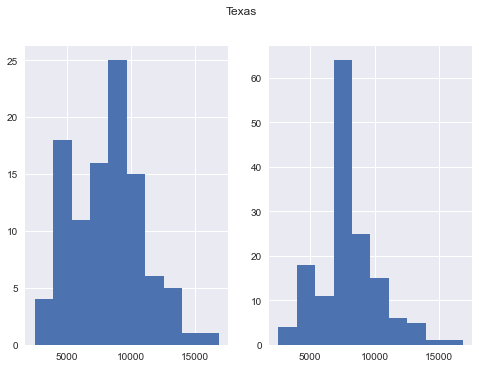

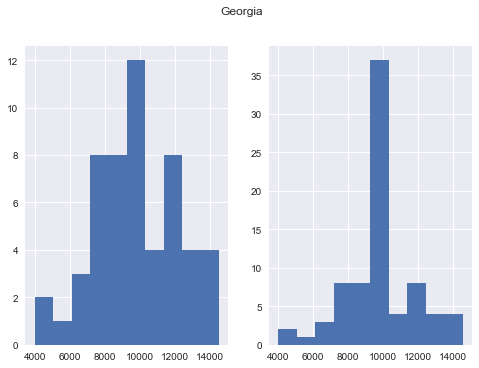

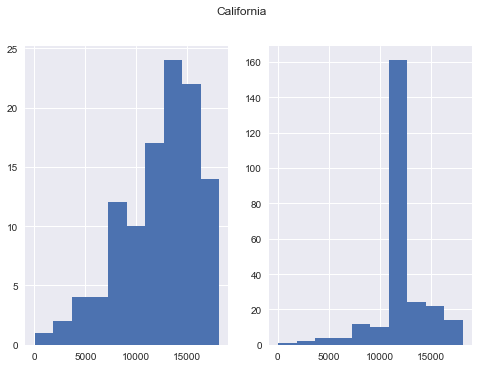

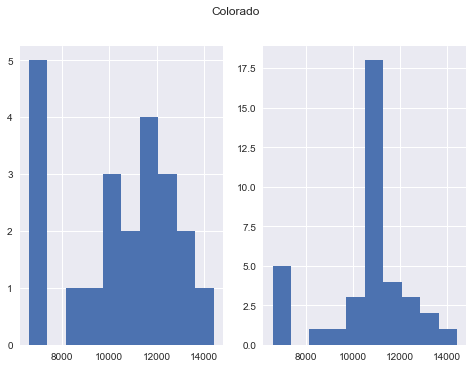

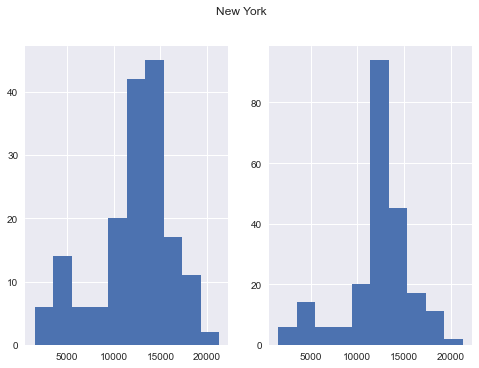

In [21]:
histogram_comparision(tuition_cost_data, tuition_cost_data2, 'state', states_rb, 5)

The graph comparison above shows that taking the mean of room and board of each state is not very optimal, we conclude this because it seems like there are a lot of missing values, this causes a big concentration of values on the mean of each state (the ones we created). We can clearly see this in the histogram comparison, there is a big spike on the value of the mean of each state. <br>

Another thing we could try and do to solve this issue is to get the mean of each state, but now also considering every type of university (private, public, etc.). In other words, we will get the mean of each type of university of each state, resulting in 4 mean values per state.

In [22]:
### We will use the original data (already cleaned the state column)

tuition_cost_data2.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [23]:
### We get the university types

university_type = tuition_cost_data2['type'].unique()
university_type

array(['Public', 'Private', 'For Profit', 'Other'], dtype=object)

In [24]:
def state_rb_mean(uniques: 'List of values', state: 'State'):
    
    'Function to get the mean of one state according to the different types of universities'
    
    # Filter per state
    state_df = tuition_cost_data2[tuition_cost_data2['state'] == state]
    
    # We get the mean of each type of university
    state_means = [state_df[state_df['type'] == uniques[i]].iloc[:,5].mean() for i in range(len(uniques))]
    
    # DataFrame containing the state, the type and its mean
    df = pd.DataFrame(data = {'State': [state] * len(uniques),
                             'Type': uniques,
                             'Room and Board Average': state_means})
    return df

In [25]:
### We iterate over the function avobe, changing the state
# The function gets the room and board average depending of the type
# the for loop allows us to get this for each state

averagerb_per_type = pd.concat([state_rb_mean(university_type, states_rb[i]) for i in range(len(states_rb))])
averagerb_per_type

,State,Type,Room and Board Average
0,Texas,Public,7367.983051
1,Texas,Private,9228.690476
2,Texas,For Profit,9600.000000
3,Texas,Other,NaN
0,Georgia,Public,9383.153846
...,...,...,...
3,New Mexico,Other,NaN
0,Nevada,Public,8246.000000
1,Nevada,Private,13357.000000
2,Nevada,For Profit,NaN


In [26]:
# If the row has a NaN, we replace it the corresponding value depending on the state and type

for i in range(len(tuition_cost_data2)):
    if pd.isna(tuition_cost_data2.iloc[i,5]) == True: # If room_and_board is NaN...
        # This replaces the NaN value searching in the average DataFrame the corresponding
        # value depending on the state and type of the Nan row
        tuition_cost_data2.iloc[i,5] = averagerb_per_type[((averagerb_per_type['State'] == tuition_cost_data2.iloc[i,1]) & (averagerb_per_type['Type'] == tuition_cost_data2.iloc[i,3]))].iloc[0,2]

tuition_cost_data2

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,7666.700000,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.000000,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.000000,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.000000,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,8782.909091,5740,5740,12190,12190
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.000000,29117,41489,29117,41489
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.000000,8950,18350,14950,24350
2971,Yuba College,California,CA,Public,2 Year,12576.195122,1400,1400,8420,8420


The NaN values have been now filled according to the criteria explained before, the next thing to do is compare the data distribution through histograms to check if we altered the distribution a lot. In order to do this we import the normal data again, do the first cleaning part and then compare  it with the manipulated data.

In [27]:
# Importing the original data once again
tuition_cost_data3 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')

# Run the cleaning function made before (DC)
tuition_cost_data3 = clean_tcd_state(tuition_cost_data3)
tuition_cost_data3.head()


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


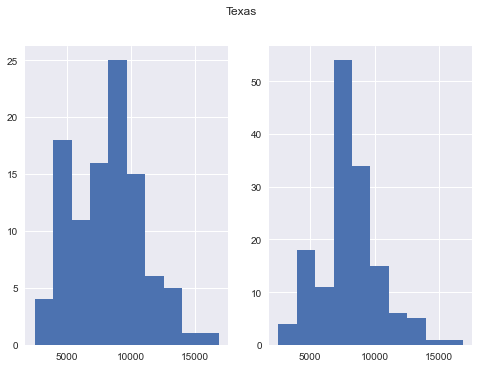

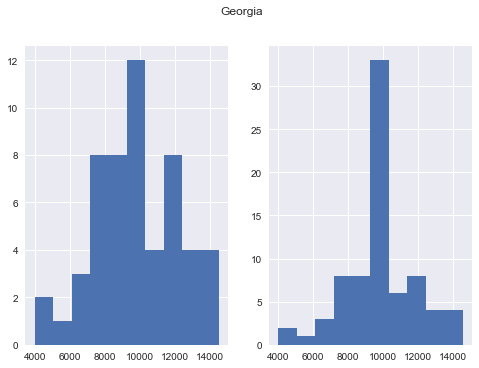

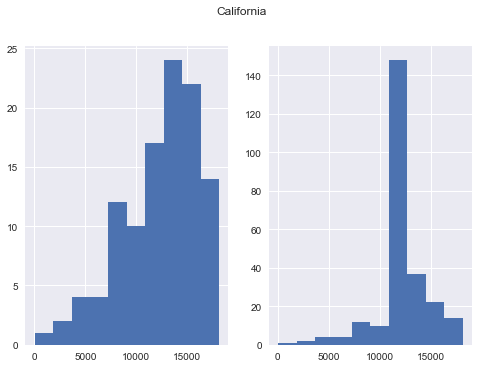

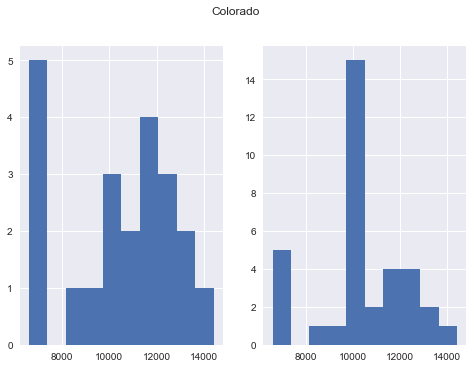

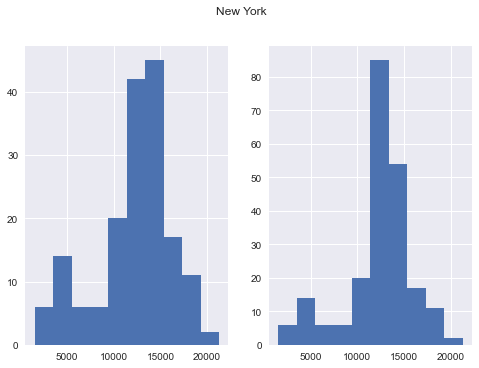

In [28]:
# Using our function, we compare the new and original data histograms
histogram_comparision(tuition_cost_data2, tuition_cost_data3, 'state', states_rb, 5)

The previous graphs show that once again, this really doesn't work, we can see a lot of values concentrated on the average of each state. One last thing that we can do to fill them avoiding this issue is to create random values, using the mean and standard deviation of each state. In this case, the new values will not be concentrated on a certain value, we will have many of them generated randomly. 

In [29]:
## We already have the mean of each state here, we need the standard deviation to generate random numbers
average_rb.head()

,Average Room and Board
State,
Texas,8156.039216
Georgia,9905.240741
California,12340.454545
Colorado,10544.045455
New York,12148.639053


In [30]:
# We now get the standard deviation of the room_and_board of each state
average_rb['Std Room and Board'] = [mean_df[mean_df['state'] == states_rb[i]].iloc[:,5].std() for i in range(len(states_rb))]
average_rb.head()

,Average Room and Board,Std Room and Board
State,,
Texas,8156.039216,2797.722769
Georgia,9905.240741,2416.295667
California,12340.454545,3697.420521
Colorado,10544.045455,2339.027402
New York,12148.639053,4141.525799


In [31]:
# Set random seed
np.random.seed(305)

# If the row is empty, fill it with a random number depending on the state
# The random number will be generated with the mean and std of the state
for i in range(len(tuition_cost_data3)):
    if pd.isna(tuition_cost_data3.iloc[i,5]) == True:
        tuition_cost_data3.iloc[i,5] = round(np.random.normal(loc = average_rb.loc[tuition_cost_data3.iloc[i,1]][0], scale = average_rb.loc[tuition_cost_data3.iloc[i,1]][1]),2)

tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,5740,12190,12190
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489,29117,41489
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350,14950,24350
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,1400,8420,8420


We already have the random numbers in the DataFrame, we can compare the distribution of them against the original data just like before.

In [32]:
# Importing the original data and doing the first cleaning step
tuition_cost_data4 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')

tuition_cost_data4 = clean_tcd_state(tuition_cost_data4)
tuition_cost_data4.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


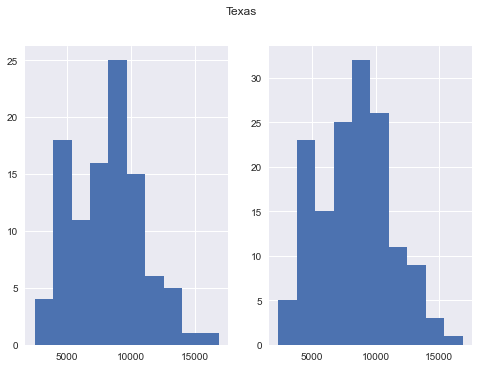

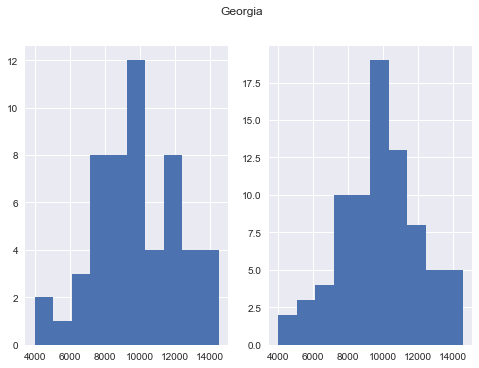

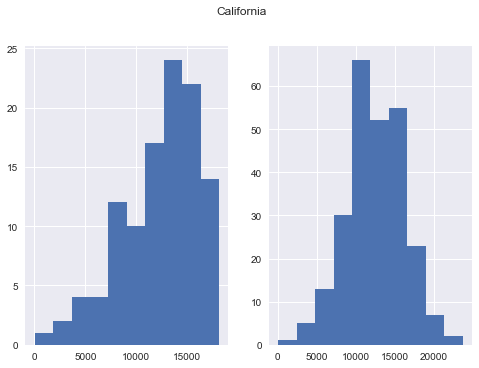

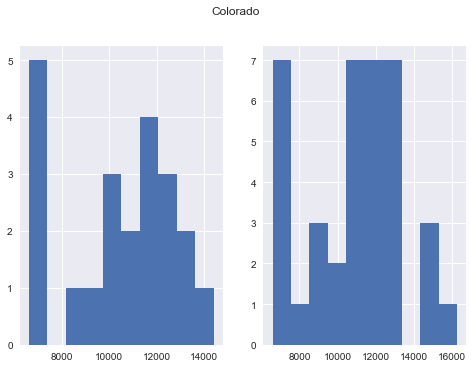

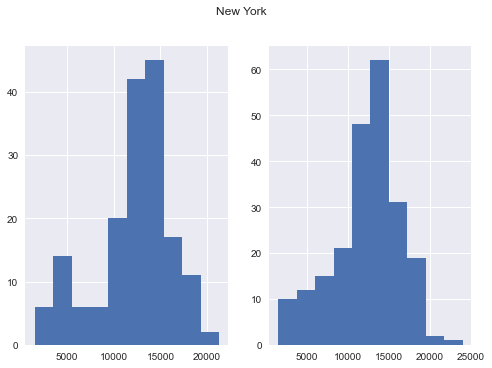

In [33]:
# Histogram comparision using our function
histogram_comparision(tuition_cost_data3, tuition_cost_data4, 'state', states_rb, 5)

The graphs above shows that this method of filling the missing values worked better than the ones before, the data distribution, even though it's a bit different (for obvious reasons), hasn't changed a lot. There is a higher concentration of observations, but they're better distributed than before, not concentrated on a single value. Since this worked, we will keep this as our new and cleaned data instead of deleting the missing values. <br>

Since we created random numbers, there might be some zeros, if this is the case the code blow deletes the row. Along with this, since we have all the room and board costs, the in state and out of state total tuition can now be completed with this information.

In [34]:
# Delete the row if the room and board is less than 0
tuition_cost_data3.drop(tuition_cost_data3[tuition_cost_data3['room_and_board'] < 0].index, inplace = True)

# Add the generated room and board cost to the total tuition cost
tuition_cost_data3['in_state_total'] = round(tuition_cost_data3['in_state_tuition'] + tuition_cost_data3['room_and_board'],0)

tuition_cost_data3['out_of_state_total'] = round(tuition_cost_data3['out_of_state_tuition'] + tuition_cost_data3['room_and_board'],0)

tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,13286.0,12190,19736.0
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489.0,29117,41489.0
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350.0,14950,24350.0
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,12277.0,8420,19297.0


In [35]:
# Data quality report of the all new cleaned data 
dqr(tuition_cost_data3)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
name,name,object,0,2929,2894,ASA College,Zane State College
state,state,object,0,2929,51,Alabama,Wyoming
state_code,state_code,object,0,2929,51,AK,WY
type,type,object,0,2929,4,For Profit,Public
degree_length,degree_length,object,0,2929,3,2 Year,Other
room_and_board,room_and_board,float64,0,2929,2479,30.0,23949.83
in_state_tuition,in_state_tuition,int64,0,2929,2347,480,59985
in_state_total,in_state_total,float64,0,2929,2788,1430.0,75003.0
out_of_state_tuition,out_of_state_tuition,int64,0,2929,2465,480,59985
out_of_state_total,out_of_state_total,float64,0,2929,2784,1430.0,75003.0


The data quality report shows that the cleaning process for this dataframe is complete.

### Dataset #2: Tuition Income

In [36]:
# DataFrame
tuition_income_data

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"
...,...,...,...,...,...,...,...
209007,Alabama A & M University,AL,23462,2018,Off Campus,15089.45111,"0 to 30,000"
209008,Alabama A & M University,AL,23462,2018,Off Campus,14810.60535,"30,001 to 48,000"
209009,Alabama A & M University,AL,23462,2018,Off Campus,17167.46710,"48_001 to 75,000"
209010,Alabama A & M University,AL,23462,2018,Off Campus,17558.05619,"75,001 to 110,000"


In [37]:
# Data Quality Report of the DataFrame
dqr(tuition_income_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
name,name,object,0,209012,3664,AI Miami International University of Art and D...,Zane State College
state,state,object,0,209012,51,AK,WY
total_price,total_price,int64,0,209012,22630,4906,114083
year,year,int64,0,209012,9,2010,2018
campus,campus,object,0,209012,2,Off Campus,On Campus
net_cost,net_cost,float64,0,209012,58707,-15101.0,95674.8377
income_lvl,income_lvl,object,0,209012,5,"0 to 30,000","Over 110,000"


In this data quality report we can see that the dataset looks to be very clean, there are no missing values and if we look at all the other characteristics almost everything make sense, however, we can see that the minimum value of net cost is negative, we have to see why.

In [38]:
# Rows where the value of net cost is less than zero
# Probably meaning that the university looses money
tuition_income_data[tuition_income_data['net_cost'] < 0]


,name,state,total_price,year,campus,net_cost,income_lvl
7086,South Texas Training Center,TX,5787,2011,Off Campus,-819.0,"0 to 30,000"
7098,South Texas Training Center,TX,16100,2014,Off Campus,-7086.0,"48_001 to 75,000"
8743,Yeshiva Toras Chaim,NJ,21200,2013,On Campus,-643.0,"30,001 to 48,000"
8746,Yeshiva Toras Chaim,NJ,21200,2014,On Campus,-581.0,"0 to 30,000"
8747,Yeshiva Toras Chaim,NJ,21200,2014,On Campus,-42.0,"30,001 to 48,000"
...,...,...,...,...,...,...,...
204709,Eastern Arizona College,AZ,12345,2012,On Campus,-1071.0,"0 to 30,000"
204747,Eastern Arizona College,AZ,12298,2011,Off Campus,-7562.0,"75,001 to 110,000"
204749,Eastern Arizona College,AZ,12538,2012,Off Campus,-1071.0,"0 to 30,000"
206483,Reid State Technical College,AL,11825,2012,Off Campus,-400.0,"48_001 to 75,000"


We can see that the number of rows where the net cost is less than zero is only 107, this is a very little number in comparison to the 209,000 total rows. Since it doesn't represent a high percentage of the total data, we decide to eliminate these rows and work without them.


In [39]:
# Removing the rows where net cost is less than zero
tuition_income_data.drop(tuition_income_data[tuition_income_data['net_cost'] < 0].index, inplace = True)
# .index toma el número de fila

# Data quality report of cleaned data
dqr(tuition_income_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
name,name,object,0,208905,3664,AI Miami International University of Art and D...,Zane State College
state,state,object,0,208905,51,AK,WY
total_price,total_price,int64,0,208905,22630,4906,114083
year,year,int64,0,208905,9,2010,2018
campus,campus,object,0,208905,2,Off Campus,On Campus
net_cost,net_cost,float64,0,208905,58622,0.0,95674.8377
income_lvl,income_lvl,object,0,208905,5,"0 to 30,000","Over 110,000"


After deleting the rows mentioned above, the data quality report shows that the dataset is clean, there are no missing values and all the other characteristics seem to be in order.

### Dataset #3: Salary Potential

In [40]:
# Displaying the dataset to clean
salary_potential_data

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3
...,...,...,...,...,...,...,...
930,22,Viterbo University,Wisconsin,46800,81900,62.0,3
931,23,Concordia University-Wisconsin,Wisconsin,46700,81600,61.0,9
932,24,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17
933,25,University of Wisconsin-River Falls,Wisconsin,47100,81300,52.0,14


In [41]:
# Data quality report of this dataset
dqr(salary_potential_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
rank,rank,int64,0,935,25,1,25
name,name,object,0,935,934,Adams State University,Yeshiva University
state_name,state_name,object,0,935,50,Alabama,Wyoming
early_career_pay,early_career_pay,int64,0,935,310,32500,91200
mid_career_pay,mid_career_pay,int64,0,935,453,60100,158200
make_world_better_percent,make_world_better_percent,float64,33,902,58,33.0,94.0
stem_percent,stem_percent,int64,0,935,74,0,100


In [42]:
# We don't plan on using the column with missing values so we will keep it this way

After analyzing the data quality report, the only thing that stands out is that there are 33 missing values in the column named "make world better percent". However, since we are not going to use this variable/column for any part of our analysis, we will keep this dataset this way without any changes.

### Dataset #4: Historical Tuition

In [43]:
# Visulization of the dataset
historical_tuition_data

,type,year,tuition_type,tuition_cost
0,All Institutions,1985-86,All Constant,10893
1,All Institutions,1985-86,4 Year Constant,12274
2,All Institutions,1985-86,2 Year Constant,7508
3,All Institutions,1985-86,All Current,4885
4,All Institutions,1985-86,4 Year Current,5504
...,...,...,...,...
265,Private,2016-17,4 Year Constant,41468
266,Private,2016-17,2 Year Constant,24882
267,Private,2016-17,All Current,40925
268,Private,2016-17,4 Year Current,41468


In [44]:
# Data quality report of the data
dqr(historical_tuition_data)

,Nombres,Data_Types,missing_values,present_values,unique_values,min,max
type,type,object,0,270,3,All Institutions,Public
year,year,object,0,270,19,1985-86,2016-17
tuition_type,tuition_type,object,0,270,6,2 Year Constant,All Current
tuition_cost,tuition_cost,int64,0,270,260,2981,41468


In this case, the dataset is fairly clean as it is, the only thing that we are going to do is change the column "year" to be a datetime format instead of the object format.

In [45]:
# Changing the year to a datetime
historical_tuition_data['year'] = [dt.datetime.strptime(historical_tuition_data.iloc[i,1][0:4], '%Y').date().year for i in range(len(historical_tuition_data))]
historical_tuition_data


,type,year,tuition_type,tuition_cost
0,All Institutions,1985,All Constant,10893
1,All Institutions,1985,4 Year Constant,12274
2,All Institutions,1985,2 Year Constant,7508
3,All Institutions,1985,All Current,4885
4,All Institutions,1985,4 Year Current,5504
...,...,...,...,...
265,Private,2016,4 Year Constant,41468
266,Private,2016,2 Year Constant,24882
267,Private,2016,All Current,40925
268,Private,2016,4 Year Current,41468


After doing this, the dataset should be now clean as well as the other ones we will use for our analysis. However, this does not necessarily mean that the cleaning is 100% complete, as the project develops we might need some variables to change even more in order to complete different analysis.

## Exploratory Data Analysis

This section of the project will be the exploratory data analysis according to the research questions proposed in the beginning of the project.

#### Are tuitions getting too high? Are they growing exponentially?

In [46]:
# Dataset to use for this analysis/question
tuition_grow = historical_tuition_data[(historical_tuition_data['tuition_type'] == "All Constant") & (historical_tuition_data['type'] == "All Institutions")]
tuition_grow.head()

,type,year,tuition_type,tuition_cost
0,All Institutions,1985,All Constant,10893
6,All Institutions,1995,All Constant,13822
12,All Institutions,2000,All Constant,14995
18,All Institutions,2001,All Constant,15497
24,All Institutions,2002,All Constant,16008


Quick important note, we use the all constant tuition cost, meaning the quantity is adjusted for inflation.

In [47]:
def plot_timeseries(x, y, title, xlabel, ylabel, plots, labels):
    
    'Function that plots a timeseries, it can plot multiple using a for loop'
    
    plt.figure(figsize = (12,8))
    
    for i in range(plots):
        sns.lineplot(x = x[i], y = y[i], marker = 'o', markersize = 6, label = labels[i]).set(title = title)
        
    plt.title(title, fontweight = "bold")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(loc = 'best', fontsize = 'large')
    plt.show()

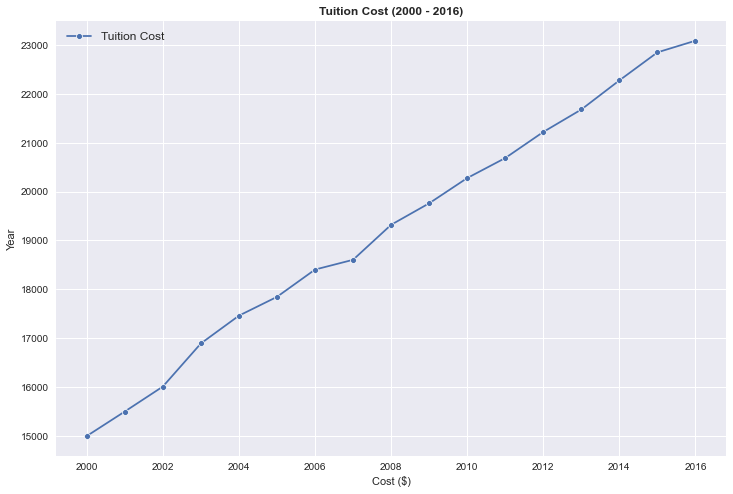

In [48]:
# Plot of the cost of tuition (all constant o adjusted for inflation) from 2000 to 2016

plot_timeseries([tuition_grow.iloc[2:,1]], [tuition_grow.iloc[2:,3]], 'Tuition Cost (2000 - 2016)', 'Cost ($)', 'Year', 1, ['Tuition Cost'])

If we plot the time series of the tuition cost (all constant) over the years, we can see that it has grown quite a bit since the year 2000. We can answer the second question with this, tuition costs are not quite growing exponentially, they seem to be growing in a linear way, increasing by a bit each year. <br>

Along with this, we can also analyze the tuition growth each year but in a percentage format, the code and conclusions of this are down below.

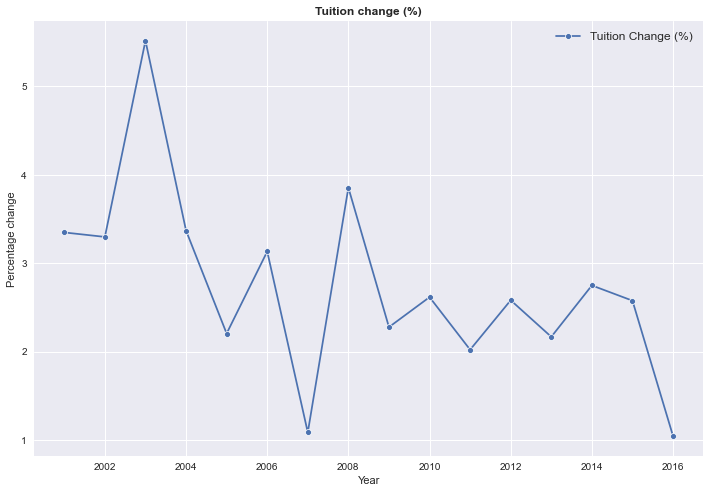

In [49]:
# We get the percentage change in tuition for each year
tuition_pct_change = tuition_grow.iloc[2:,3].pct_change().dropna() * 100

# Plot of the percentage change of tuition along the years
plot_timeseries([tuition_grow.iloc[3:,1]], [tuition_pct_change], 'Tuition change (%)', 'Year', 'Percentage change', 1, ['Tuition Change (%)'])


Even though the tuition cost is growing each year, the changes in the rates are not very exaggerated, meaning they are growing constantly each year apart from maybe 2003 where there was a giant spike of about 5%. If we don't take this outlier into account, most years the tuition cost grows between 2% and 4%. We can see this getting the average percentage growth of all the years.

In [50]:
# Average percentage change per year

round(tuition_pct_change.mean(), 2)

2.74

From the year 2000 and onwards, on average, tuition cost grows 2.74% per year.

In [51]:
# Tuition percentage growth since 2000
round(tuition_grow.iloc[[2, -1], 3].pct_change().dropna() * 100, 2)

108    53.99
Name: tuition_cost, dtype: float64

From the year 2000 to 2016, the tuition has grown in total 53.99%.

Considering the results displayed above, we can conclude that tuitions are getting high, but they don't seem to be growing an exorbitant amount. This growth seems to be quite constant if we see the yearly average, however, the fact the college has gotten 54% more expensive in the last 16 years might be a little concerning. In order to actually answer the question "are tuitions getting too high", we need to analyze another variable which will be the average salary.

#### Are salaries growing at the same rate as tuitions?

In [52]:
# Dataset to analyse/answer this question
salary_potential_data

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3
...,...,...,...,...,...,...,...
930,22,Viterbo University,Wisconsin,46800,81900,62.0,3
931,23,Concordia University-Wisconsin,Wisconsin,46700,81600,61.0,9
932,24,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17
933,25,University of Wisconsin-River Falls,Wisconsin,47100,81300,52.0,14


In [53]:
# Dataset to analyse/answer this question
tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,13286.0,12190,19736.0
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489.0,29117,41489.0
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350.0,14950,24350.0
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,12277.0,8420,19297.0


In order to answer this question, we needed some data about the averages wages in the US throughout the years to compare it against the tuition data that we already have. For the sake of simplicity and for the notebook to run smoothly, instead of reading the CSV with the following inflation data, a dataframe will be created manually.

In [54]:
# Data Frame with the average salary in the US per year

average_salary_US = pd.DataFrame(data = {'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 
                                             2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
                                   'Average salary': [57499, 57940, 58405, 59034, 60127, 60184, 61085,
                                                          62242, 62089, 62711, 63265, 63349, 63890, 63588, 
                                                          64513, 66140, 66260]})

average_salary_US['Change (%)'] = round(average_salary_US['Average salary'].pct_change() * 100, 2)
average_salary_US.head()

# Data from: https://data.oecd.org/earnwage/average-wages.htm

,Year,Average salary,Change (%)
0,2000,57499,NaN
1,2001,57940,0.77
2,2002,58405,0.80
3,2003,59034,1.08
4,2004,60127,1.85


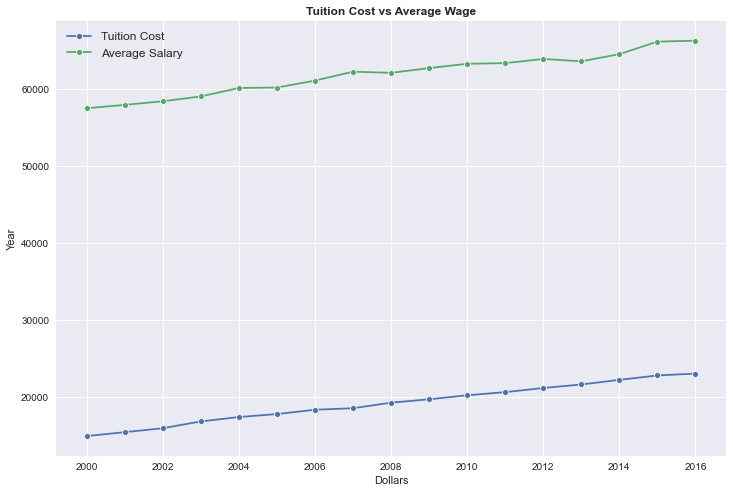

In [55]:
# We plot both the tuition cost and the average salary over the years to compare them

plot_timeseries([tuition_grow.iloc[2:,1], average_salary_US['Year']], [tuition_grow.iloc[2:,3], average_salary_US['Average salary']], 'Tuition Cost vs Average Wage', 'Dollars', 'Year', 2, ['Tuition Cost', 'Average Salary'])

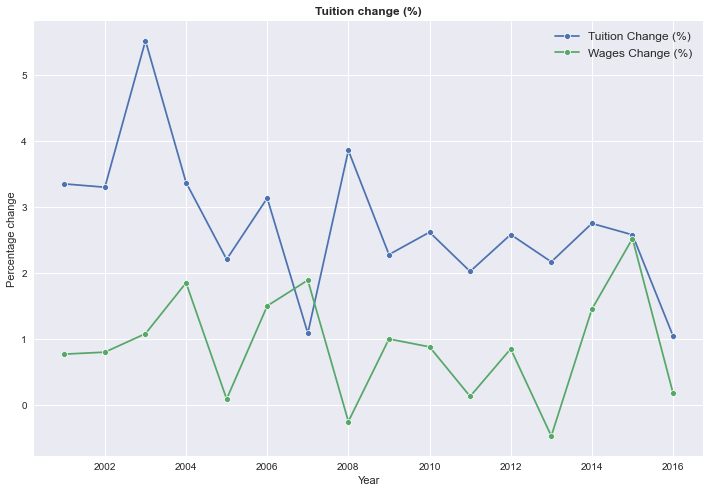

In [56]:
# We also plot the percentage change over the years to get a more accurate comparision between 
# the changes of both

plot_timeseries([tuition_grow.iloc[3:,1], average_salary_US['Year']], [tuition_pct_change, average_salary_US['Change (%)']], 'Tuition change (%)', 'Year', 'Percentage change', 2, ['Tuition Change (%)', 'Wages Change (%)'])


The first graph shows that both salaries and tuition seem to be moving in the same direction and at a similar rate, both lines are pretty similar. In order to better understand the movement of both variables, we can also get the percentage change of both along the years. This second graph shows a completely different story, although the change of both is very similar (the movement each year), the tuition changes in a higher percentage than the yearly wages every single year except 2007. This means that college is getting more expensive every year and the wages do not match this increase in tuition, at one point it's possible that tuition could be has high as a yearly salary. In conclusion, thanks to this comparison and the analysis done in the previous question, we can see that maybe tuitions are getting a little expensive nowadays.

#### Is there a difference between private and public universities? (average tuition and salary per type)

In [57]:
# DataFrame used for this analysis/question
tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,13286.0,12190,19736.0
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489.0,29117,41489.0
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350.0,14950,24350.0
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,12277.0,8420,19297.0


In order to answer this question, we will get the tuition cost of a public and a private university, considering both in state and out of state to see if there are any differences. Before doing it, we obviously suspect that tuition in private universities will be much higher than public ones.

In [58]:
# In state and out of state public tuition cost

ispu, ospu = tuition_cost_data3[tuition_cost_data3['type'] == 'Public'].iloc[:,7].mean(), tuition_cost_data3[tuition_cost_data3['type'] == 'Public'].iloc[:,9].mean()

# In state and out of state private tuition cost

ispr, ospr = tuition_cost_data3[tuition_cost_data3['type'] == 'Private'].iloc[:,7].mean(), tuition_cost_data3[tuition_cost_data3['type'] == 'Private'].iloc[:,9].mean()

In [59]:
def plot_bar2(x_labels: 'Labels in a list', left_bar: 'Left bar information in list', 
              right_bar: 'Right bar information in list', bar_lab: 'Type labels in list',
             xlabel, ylabel, title):
    
    'Function that plots 2 bars to make a comparision'
    
    labels = x_labels

    x_axis = np.arange(len(labels))

    plt.bar(x_axis - 0.2, left_bar, 0.4, label = bar_lab[0])
    plt.bar(x_axis + 0.2, right_bar, 0.4, label = bar_lab[1])
    plt.xticks(x_axis, labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc = 'best')
    plt.show()

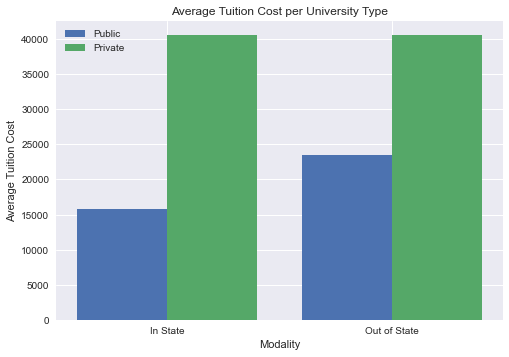

In [60]:
# We plot the comparision of the tuition between private and public universities both in and out of state

plot_bar2(['In State', 'Out of State'], [ispu, ospu], [ispr, ospr], ['Public', 'Private'], 'Modality', 'Average Tuition Cost', 'Average Tuition Cost per University Type')


Just as we thought, the tuition in private universities is considerable higher. There is a big difference between going to a private and a public university in terms of the cost, we can make a similar comparison but instead of the tuition we will compare the potential salary.

In [61]:
# Concatenate the tution and salary potential dataframe if the name of the university appears on both
# Doing this allows us to have both the type of university and the salary potential on one dataframe
salary_types = pd.merge(tuition_cost_data3, salary_potential_data, on='name', how='right')
salary_types.dropna(inplace = True)
salary_types.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,Auburn University,Alabama,AL,Public,4 Year,13332.0,11276.0,24608.0,30524.0,43856.0,1,Alabama,54400,104500,51.0,31
1,University of Alabama in Huntsville,Alabama,AL,Public,4 Year,10094.0,10714.0,20808.0,22362.0,32456.0,2,Alabama,57500,103900,59.0,45
3,Tuskegee University,Alabama,AL,Private,4 Year,9650.0,22170.0,31820.0,22170.0,31820.0,4,Alabama,54500,93500,61.0,30
4,Samford University,Alabama,AL,Private,4 Year,10550.0,31650.0,42200.0,31650.0,42200.0,5,Alabama,48400,90500,52.0,3
5,Spring Hill College,Alabama,AL,Private,4 Year,13462.0,39464.0,52926.0,39464.0,52926.0,6,Alabama,46600,89100,53.0,12


In [62]:
# Early and mid career pay public

ecpu, mipu = salary_types[salary_types['type'] == 'Public'].iloc[:,12].mean(), salary_types[salary_types['type'] == 'Public'].iloc[:,13].mean()

# Early and mid career private

ecpr, mipr = salary_types[salary_types['type'] == 'Private'].iloc[:,12].mean(), salary_types[salary_types['type'] == 'Private'].iloc[:,13].mean()


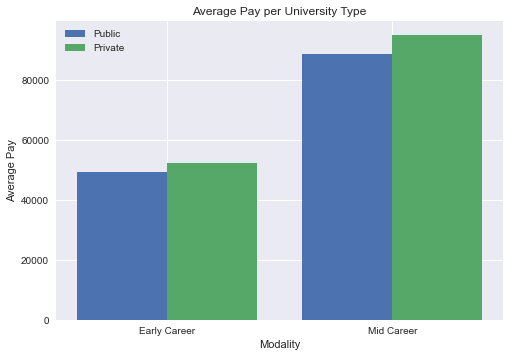

In [63]:
# Plot of the comparision of the salary between private and public universities both in and out of state

plot_bar2(['Early Career', 'Mid Career'], [ecpu, mipu], [ecpr, mipr], ['Public', 'Private'], 'Modality', 'Average Pay', 'Average Pay per University Type')


In terms of potential salary, both early and mid career, private universities tend to pay higher but, unlike tuition, the difference is not big at all. We can see that the salary is you attend a private university is just slightly higher than if you go to a public one, the difference is minimum, barely noticeable if you only see the early career pay. In conclusion, there is a big difference between both types of universities, private ones charge more but in the end, both type end up paying almost a similar amount of money. This could mean that it might be better to go to a public university and save the high tuition cost of the private ones, saving a decent amount of money.

#### Does the rank of the university matter when it comes to potential salary?

In [64]:
# Getting the possible ranks
ranks = salary_potential_data['rank'].unique()
ranks.sort()
ranks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [65]:
# We get the average early and mid career pay according to the rank

# Loop that gets the mean of each rank and stores it in a DataFrame
avg_salary_per_rank = pd.DataFrame([salary_potential_data[salary_potential_data['rank'] == ranks[i]].iloc[:,[3,4]].mean() for i in range(len(ranks))])
avg_salary_per_rank['rank'] = ranks
avg_salary_per_rank = avg_salary_per_rank[['rank', 'early_career_pay', 'mid_career_pay']]
avg_salary_per_rank.head()


,rank,early_career_pay,mid_career_pay
0,1,64126.000000,117114.000000
1,2,59496.078431,108450.980392
2,3,56962.500000,104316.666667
3,4,55819.148936,101646.808511
4,5,53121.276596,96044.680851


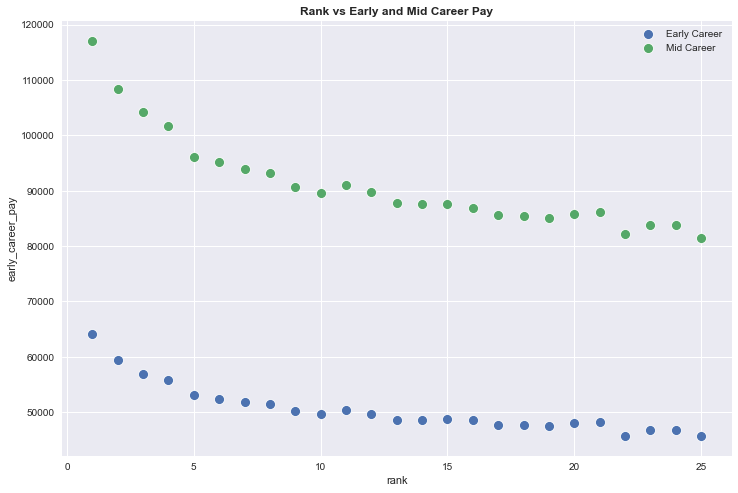

In [66]:
# Scatterplot that compares the rank and both the early and mid career pay

plt.figure(figsize = (12,8))
sns.scatterplot(x = 'rank', y = 'early_career_pay', data = avg_salary_per_rank, label = 'Early Career', s = 100);
sns.scatterplot(x = 'rank', y = 'mid_career_pay', data = avg_salary_per_rank, label = 'Mid Career', s = 100);
plt.title('Rank vs Early and Mid Career Pay', fontweight = "bold")
plt.show()

The graph above shows that in fact, the rank of the university matters when it comes to potential salary. We can see that on the left of the graph (higher ranks), both early and mid career pay is higher, especially for the number 1 rank. As we move to the right, which means going down the rank, the potential career pay also starts to generally decrease. This clearly shows that if you go to a high ranked university, your potential salary can be much higher.

#### Studying in a high tuition university grants you a high salary?

We saw in the last question that rank plays a big part in potential salary, however, does the amount you pay also plays a role in it?

In [67]:
# Data to analyse/answer the question
tuition_vs_salary = salary_types.sort_values(by = 'in_state_tuition', ascending = False)
tuition_vs_salary.head()


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
189,University of Chicago,Illinois,IL,Private,4 Year,16350.0,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22
102,Trinity College,Connecticut,CT,Private,4 Year,14750.0,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22
54,Harvey Mudd College,California,CA,Private,4 Year,18127.0,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85
389,Amherst College,Massachusetts,MA,Private,4 Year,14740.0,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32
386,Tufts University,Massachusetts,MA,Private,4 Year,14560.0,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25


In [68]:
def plot_scatterreg(x, y, data, title):
    
    'Function that makes a scatterplot along with a regression line'
    
    plt.figure(figsize = (12,8))
    sns.regplot(x = x, y = y, data = data,
           scatter_kws = {"color": "royalblue"}, line_kws = {"color": "green"});
    plt.title(title, fontweight = "bold")
    plt.show()

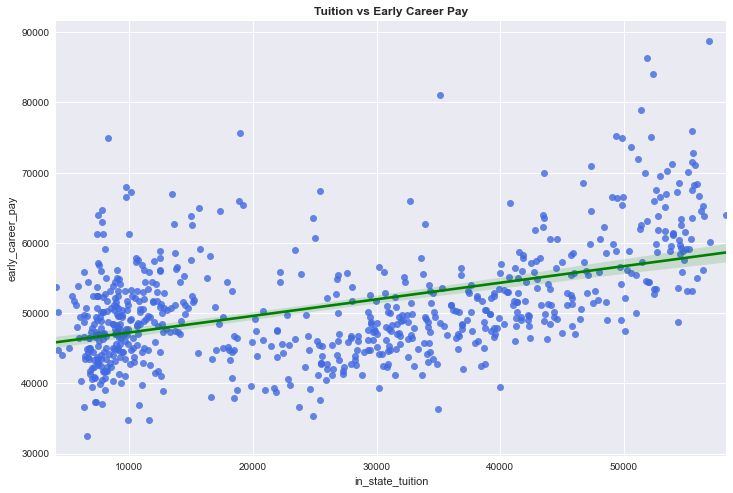

In [69]:
plot_scatterreg('in_state_tuition', 'early_career_pay', tuition_vs_salary, 'Tuition vs Early Career Pay')

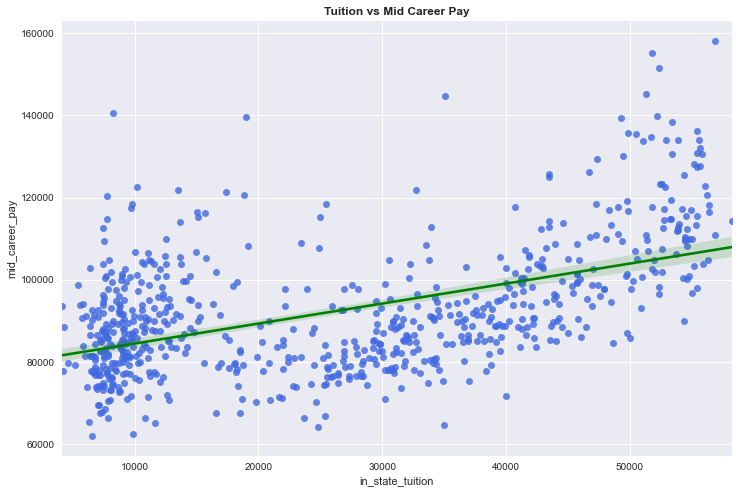

In [70]:
plot_scatterreg('in_state_tuition', 'mid_career_pay', tuition_vs_salary, 'Tuition vs Mid Career Pay')

Just like with the rank, it seems like paying more in tuition at most unveristies will increase the chance of getting payed more. The green line shows this relation, as the tuition gets higher so do both early and mid career pay, there are of course some excpetions but generally this is the trend. So far the results are showing that studying at a high rank and high tuition unversity will be the best option if you want ot get the highest salary possible.

#### Is there a relation between the tuition and the rank of the university?

In [71]:
# Data to analyse/answer the question
tuition_vs_salary.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
189,University of Chicago,Illinois,IL,Private,4 Year,16350.0,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22
102,Trinity College,Connecticut,CT,Private,4 Year,14750.0,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22
54,Harvey Mudd College,California,CA,Private,4 Year,18127.0,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85
389,Amherst College,Massachusetts,MA,Private,4 Year,14740.0,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32
386,Tufts University,Massachusetts,MA,Private,4 Year,14560.0,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25


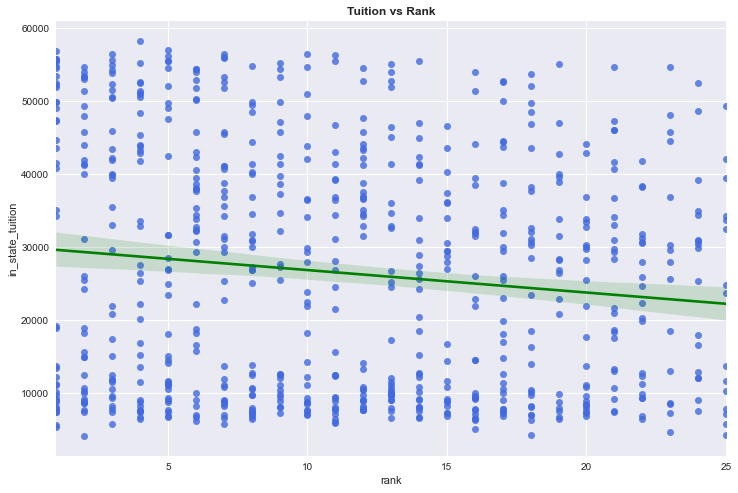

In [72]:
# Scatterplot and regressio showing the relation between the tuition and rank of universities
plot_scatterreg('rank', 'in_state_tuition', tuition_vs_salary, 'Tuition vs Rank')

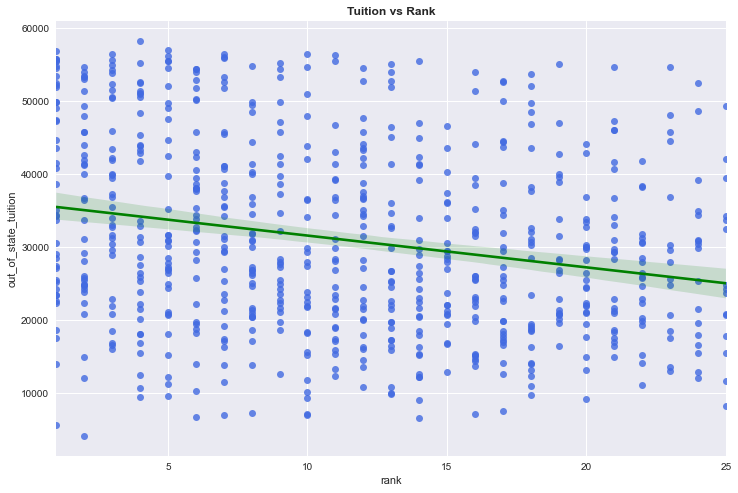

In [73]:
# Scatterplot and regressio showing the relation between the tuition and rank of universities
plot_scatterreg('rank', 'out_of_state_tuition', tuition_vs_salary, 'Tuition vs Rank')

Just like with the rank, it seems like paying more in tuition at most universities will increase the chance of getting paid more. The green line shows this relation, as the tuition gets higher so do both early and mid career pay, there are of course some exceptions, but generally this is the trend. So far the results are showing that studying at a high rank and high tuition university will be the best option if you want to get the highest salary possible.

#### What is the percentage of students that pay the full tuition or have no scholarship? 

In [74]:
# Data to analyse/answer the question
tuition_income_data

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"
...,...,...,...,...,...,...,...
209007,Alabama A & M University,AL,23462,2018,Off Campus,15089.45111,"0 to 30,000"
209008,Alabama A & M University,AL,23462,2018,Off Campus,14810.60535,"30,001 to 48,000"
209009,Alabama A & M University,AL,23462,2018,Off Campus,17167.46710,"48_001 to 75,000"
209010,Alabama A & M University,AL,23462,2018,Off Campus,17558.05619,"75,001 to 110,000"


In order to answer the question, we think it's necessary to explain the DataFrame just a little bit, especially the net cost column. The total price is the cost of tuition that year, meanwhile, the net cost is the average actually paid after discounts or scholarships/awards given by the university. This means that, if we get the total price and net cost that are different, we will have how many universities gave scholarships each year.

In [75]:
def scholarship_percent(column, for_list):
    
    'Function that gets the scholarship percentage of universities, in other words, how many universities (%) out of the total gave a discount'
    
    full_payment = len(tuition_income_data[(tuition_income_data['total_price'] == tuition_income_data['net_cost']) & (tuition_income_data[column] == for_list)])
    for_len = len(tuition_income_data[tuition_income_data[column] == for_list])
    
    sch_percent = round(100 - (full_payment/for_len) * 100, 2)
    
    return for_list, sch_percent
    

In [76]:
# Years to iterate over
tid_years = tuition_income_data['year'].unique()
tid_years.sort()
tid_years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [77]:
# Dataframe with the % of universites that give discounts, iterating over the years
sch_df = pd.DataFrame([scholarship_percent('year', i) for i in tid_years], columns = ['Year', 'Percentage'])
#sch_df.columns['Year', 'Percentage']
sch_df

,Year,Percentage
0,2010,99.82
1,2011,99.82
2,2012,99.86
3,2013,99.90
4,2014,99.79
5,2015,99.82
6,2016,99.92
7,2017,99.93
8,2018,99.93


In [78]:
def plot_bar(x, bar_height, xlab, ylab, title):
    
    'This function just makes a plit bar according to the parameters that you give to it'
    
    plt.figure(figsize = (12, 8))
    plt.bar(x, bar_height, 0.5, color = 'cadetblue')
    plt.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.ylim([98, 100])
    plt.title(title, fontweight = "bold")
    plt.show()

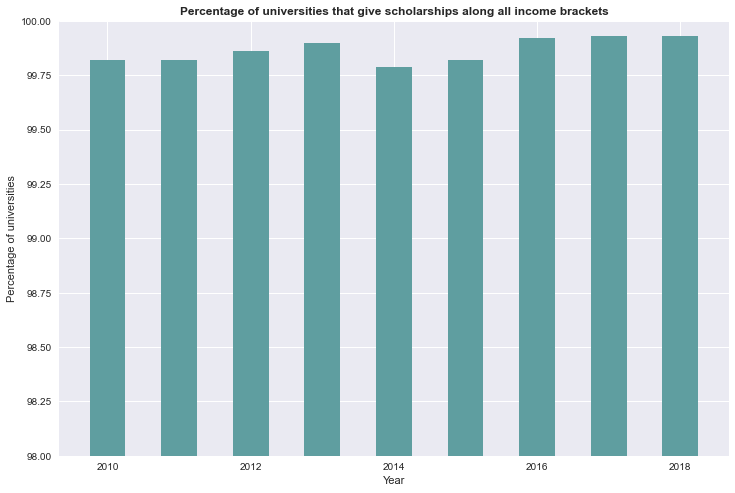

In [79]:
plot_bar(tid_years, sch_df.iloc[:,1], 'Year', 'Percentage of universities', 'Percentage of universities that give scholarships along all income brackets')

After manipulating the information and plotting the results, we can see that every year, 99% of universities give scholarships along all income brackets. We said before that tuition is a little high and that paying less to study in a public university might be better as you pay less and earn almost the same, however, if people are not paying the full amount then all of the conclusions above might change.

#### Does income affect the scholarship rate?

In [80]:
# We get all the income brackets
tid_incomes = tuition_income_data['income_lvl'].unique()
tid_incomes.sort()
tid_incomes

array(['0 to 30,000', '30,001 to 48,000', '48_001 to 75,000',
       '75,001 to 110,000', 'Over 110,000'], dtype=object)

In [81]:
# Iterate over brackets to get % of universities that give discounts per bracket
sch_vs_income = pd.DataFrame([scholarship_percent('income_lvl', i) for i in tid_incomes], columns = ['Income Bracket', 'Percentage'])
sch_vs_income

,Income Bracket,Percentage
0,"0 to 30,000",99.98
1,"30,001 to 48,000",99.95
2,"48_001 to 75,000",99.90
3,"75,001 to 110,000",99.79
4,"Over 110,000",99.69


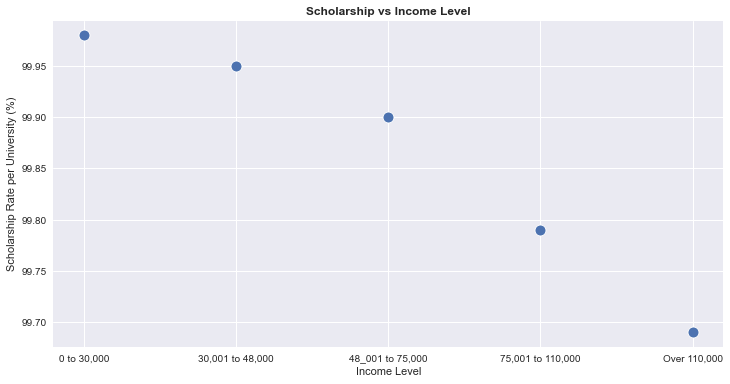

In [82]:
# Scatterplot of the results, comparing the income level against the scholarhip %
plt.figure(figsize = (12, 6))
sns.scatterplot(x = sch_vs_income.iloc[:,0], y = sch_vs_income.iloc[:,1], data = sch_vs_income, s = 120)
plt.title('Scholarship vs Income Level', fontweight = "bold")
plt.xlabel('Income Level')
plt.ylabel('Scholarship Rate per University (%)')
plt.show()


As we can see, the graphic shows that the more you earn, the less of a chance to get a scholarship, however, if we look closely we can see that the variation is practically nothing. People who earn over 110,000 have received discounts for 99.7% of universities, and people who earn 0 to 30,000 have received 99.95%. We can conclude that income level does have influence the scholarship rate but not enough to be significative.

#### Are there significant benefits in doing a 4 year degree instead of a 2 year degree? What are the differences?

In [83]:
# Dataframe to work with
tuition_vs_salary.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
189,University of Chicago,Illinois,IL,Private,4 Year,16350.0,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22
102,Trinity College,Connecticut,CT,Private,4 Year,14750.0,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22
54,Harvey Mudd College,California,CA,Private,4 Year,18127.0,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85
389,Amherst College,Massachusetts,MA,Private,4 Year,14740.0,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32
386,Tufts University,Massachusetts,MA,Private,4 Year,14560.0,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25


In [84]:
# Dataframe to work with
tuition_cost_data3.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0


In [85]:
# We get the average tuition for a 2 year and a 4 year degree

tuic_2year = tuition_cost_data3[tuition_cost_data3['degree_length'] == "2 Year"].iloc[:,7].mean()
tuic_4year = tuition_cost_data3[tuition_cost_data3['degree_length'] == "4 Year"].iloc[:,7].mean()

tuic_2year, tuic_4year

(14847.635791366907, 34222.84416299559)

In [86]:
# We get the average salary (early career) for a 2 year and a 4 year degree

salar_2year = tuition_vs_salary[tuition_vs_salary['degree_length'] == "2 Year"].iloc[:,12].mean()
salar_4year = tuition_vs_salary[tuition_vs_salary['degree_length'] == "4 Year"].iloc[:,12].mean()

salar_2year, salar_4year

(43866.666666666664, 51149.356223175964)

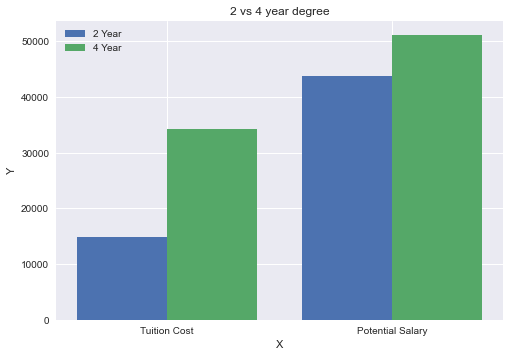

In [87]:
plot_bar2(['Tuition Cost', 'Potential Salary'], [tuic_2year, salar_2year], [tuic_4year, salar_4year], ['2 Year', '4 Year'], 'X', 'Y', '2 vs 4 year degree')
           

As we can see, the study time has great influence on both tuition and salary potential. First things first, the tuition is higher if the decision is to study for 4 years, this makes a lot of sense of course since you will have to pay for double the time, however, the graph shows that it's not necessarily true that you will pay double the amount, tuition is a bit higher than double. In terms of salary potential, we can see that studying for 4 years gives you the opportunity to make more money, nevertheless, the difference is not as big as with tuition. This can indicate that studying for less time could be a better if the objective is to save money.

## Feature Engineering

### Variable 1

The first variable to create is the time it takes to get the cost of tuition back for each university. In order to get it we need to multiply the tuition times the degree length to get the total cost, then, we will divide the total amount by the early career pay to get the years needed to get the money back.

In [88]:
# Dataset to create new variable 
tuition_vs_salary


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
189,University of Chicago,Illinois,IL,Private,4 Year,16350.00,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22
102,Trinity College,Connecticut,CT,Private,4 Year,14750.00,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22
54,Harvey Mudd College,California,CA,Private,4 Year,18127.00,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85
389,Amherst College,Massachusetts,MA,Private,4 Year,14740.00,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32
386,Tufts University,Massachusetts,MA,Private,4 Year,14560.00,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Fort Hays State University,Kansas,KS,Public,4 Year,8300.00,5133.0,13433.0,15201.0,23501.0,16,Kansas,45100,79300,64.0,6
170,Middle Georgia State University,Georgia,GA,Public,4 Year,9080.00,4608.0,13688.0,13568.0,22648.0,23,Georgia,44000,79800,57.0,11
887,Bellevue College,Washington,WA,Public,2 Year,11147.63,4258.0,15406.0,9689.0,20837.0,18,Washington,50100,88500,56.0,14
618,Western Carolina University,North Carolina,NC,Public,4 Year,9682.00,4220.0,13902.0,8220.0,17902.0,25,North-Carolina,44700,77700,58.0,8


In [89]:
# We change the degree length variable to just int numbers in order to simplify things
tuition_vs_salary['degree_length'] = [int(tuition_vs_salary.iloc[i,4][0:1]) for i in range(len(tuition_vs_salary))]
tuition_vs_salary

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
189,University of Chicago,Illinois,IL,Private,4,16350.00,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22
102,Trinity College,Connecticut,CT,Private,4,14750.00,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22
54,Harvey Mudd College,California,CA,Private,4,18127.00,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85
389,Amherst College,Massachusetts,MA,Private,4,14740.00,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32
386,Tufts University,Massachusetts,MA,Private,4,14560.00,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Fort Hays State University,Kansas,KS,Public,4,8300.00,5133.0,13433.0,15201.0,23501.0,16,Kansas,45100,79300,64.0,6
170,Middle Georgia State University,Georgia,GA,Public,4,9080.00,4608.0,13688.0,13568.0,22648.0,23,Georgia,44000,79800,57.0,11
887,Bellevue College,Washington,WA,Public,2,11147.63,4258.0,15406.0,9689.0,20837.0,18,Washington,50100,88500,56.0,14
618,Western Carolina University,North Carolina,NC,Public,4,9682.00,4220.0,13902.0,8220.0,17902.0,25,North-Carolina,44700,77700,58.0,8


In [90]:
# Years needed to get your money back with an early career salary
ttr = (tuition_vs_salary.iloc[:,7] * tuition_vs_salary.iloc[:,4]) / tuition_vs_salary.iloc[:,12]
ttr

189    4.661250
102    4.769384
54     3.378514
389    4.461818
386    4.352270
         ...   
277    1.191397
170    1.244364
887    0.615010
618    1.244027
180    0.648790
Length: 702, dtype: float64

In [91]:
tuition_vs_salary['tuition_recovery'] = ttr
tuition_vs_salary

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,tuition_recovery
189,University of Chicago,Illinois,IL,Private,4,16350.00,58230.0,74580.0,58230.0,74580.0,4,Illinois,64000,114200,41.0,22,4.661250
102,Trinity College,Connecticut,CT,Private,4,14750.00,56910.0,71660.0,56910.0,71660.0,5,Connecticut,60100,110900,49.0,22,4.769384
54,Harvey Mudd College,California,CA,Private,4,18127.00,56876.0,75003.0,56876.0,75003.0,1,California,88800,158200,55.0,85,3.378514
389,Amherst College,Massachusetts,MA,Private,4,14740.00,56426.0,71166.0,56426.0,71166.0,10,Massachusetts,63800,116500,45.0,32,4.461818
386,Tufts University,Massachusetts,MA,Private,4,14560.00,56382.0,70942.0,56382.0,70942.0,7,Massachusetts,65200,118100,49.0,25,4.352270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Fort Hays State University,Kansas,KS,Public,4,8300.00,5133.0,13433.0,15201.0,23501.0,16,Kansas,45100,79300,64.0,6,1.191397
170,Middle Georgia State University,Georgia,GA,Public,4,9080.00,4608.0,13688.0,13568.0,22648.0,23,Georgia,44000,79800,57.0,11,1.244364
887,Bellevue College,Washington,WA,Public,2,11147.63,4258.0,15406.0,9689.0,20837.0,18,Washington,50100,88500,56.0,14,0.615010
618,Western Carolina University,North Carolina,NC,Public,4,9682.00,4220.0,13902.0,8220.0,17902.0,25,North-Carolina,44700,77700,58.0,8,1.244027


In [92]:
def plot_hist(data, bins, xlab, ylab, title):
    plt.figure(figsize = (12,8))
    plt.hist(data, bins = bins)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontweight = "bold")
    plt.grid(True)
    plt.show()

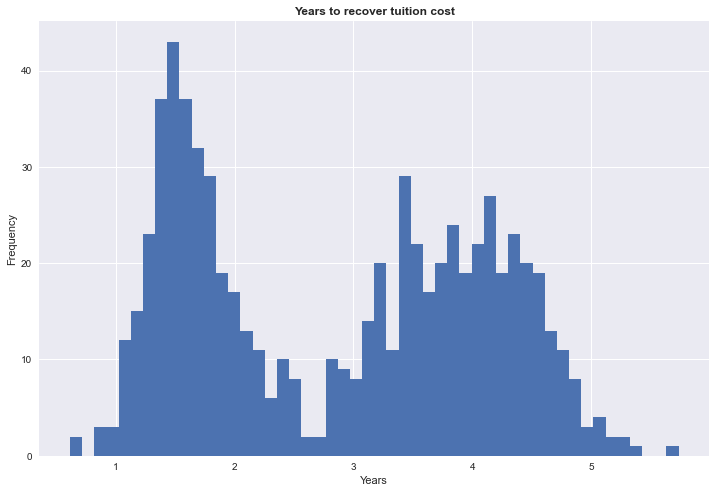

In [93]:
plot_hist(ttr, 50, 'Years', 'Frequency', 'Years to recover tuition cost')

In the previous little visualization, we can see that most of the time, it takes about 1.5 to 2 years to recover what you spend on the full degree. We can also see a big concentration of times when 4 years was the time required to recover the money.



### Variable 2

For the second feature, we will just get the average scholarship given in a percentage format, this mean, if I went to a certain university on a given year how much could I get of scholarship.

In [94]:
## DataFrame to work with
tuition_income_data

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"
...,...,...,...,...,...,...,...
209007,Alabama A & M University,AL,23462,2018,Off Campus,15089.45111,"0 to 30,000"
209008,Alabama A & M University,AL,23462,2018,Off Campus,14810.60535,"30,001 to 48,000"
209009,Alabama A & M University,AL,23462,2018,Off Campus,17167.46710,"48_001 to 75,000"
209010,Alabama A & M University,AL,23462,2018,Off Campus,17558.05619,"75,001 to 110,000"


In [95]:
# Average scholarship in percentage given
schp = tuition_income_data.iloc[:,5] / tuition_income_data.iloc[:,2]
schp

0         0.568801
1         0.567612
2         0.804451
3         0.772876
4         0.568801
            ...   
209007    0.643144
209008    0.631259
209009    0.731714
209010    0.748361
209011    0.828279
Length: 208905, dtype: float64

In [96]:
tuition_income_data['Scholarship (%)'] = round(schp * 100, 2)
tuition_income_data

,name,state,total_price,year,campus,net_cost,income_lvl,Scholarship (%)
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000",56.88
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000",56.76
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000",80.45
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000",77.29
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000",56.88
...,...,...,...,...,...,...,...,...
209007,Alabama A & M University,AL,23462,2018,Off Campus,15089.45111,"0 to 30,000",64.31
209008,Alabama A & M University,AL,23462,2018,Off Campus,14810.60535,"30,001 to 48,000",63.13
209009,Alabama A & M University,AL,23462,2018,Off Campus,17167.46710,"48_001 to 75,000",73.17
209010,Alabama A & M University,AL,23462,2018,Off Campus,17558.05619,"75,001 to 110,000",74.84


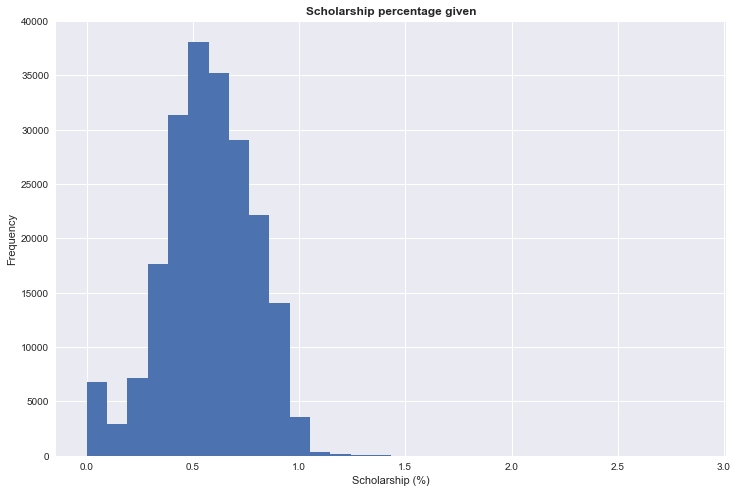

In [97]:
plot_hist(schp, 30, 'Scholarship (%)', 'Frequency', 'Scholarship percentage given')

As we can see, most universities along all the years present in the DataFrame give around a 50% discount on the total cost of tuition, remembering this is just an average.

### Variable 3

For the final feature or variable, we will get how much you have to pay extra (or not) if you decide to go to a university out of state. We will get the porcentual increment of going out of state.


In [98]:
# Dataframe to work with
tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0
...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,13286.0,12190,19736.0
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489.0,29117,41489.0
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350.0,14950,24350.0
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,12277.0,8420,19297.0


In [99]:
# Porcentual increment if you decide to go out of state

ios = (tuition_cost_data3.iloc[:,8] / tuition_cost_data3.iloc[:,6]) - 1
ios

0       0.000000
1       0.000000
2       2.040213
3       0.000000
4       0.000000
          ...   
2968    1.123693
2969    0.000000
2970    0.670391
2971    5.014286
2972    0.958580
Length: 2929, dtype: float64

In [100]:
tuition_cost_data3['oos_increment'] = ios
tuition_cost_data3

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,oos_increment
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,8043.08,2380,10423.0,2380,10423.0,0.000000
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.00,34850,45200.0,34850,45200.0,0.000000
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.00,4128,12602.0,12550,21024.0,2.040213
3,Academy College,Minnesota,MN,For Profit,2 Year,7794.90,17661,25456.0,17661,25456.0,0.000000
4,Academy of Art University,California,CA,For Profit,4 Year,16648.00,27810,44458.0,27810,44458.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2968,York Technical College,South Carolina,SC,Public,2 Year,7545.89,5740,13286.0,12190,19736.0,1.123693
2969,Young Harris College,Georgia,GA,Private,4 Year,12372.00,29117,41489.0,29117,41489.0,0.000000
2970,Youngstown State University,Ohio,OH,Public,4 Year,9400.00,8950,18350.0,14950,24350.0,0.670391
2971,Yuba College,California,CA,Public,2 Year,10876.54,1400,12277.0,8420,19297.0,5.014286


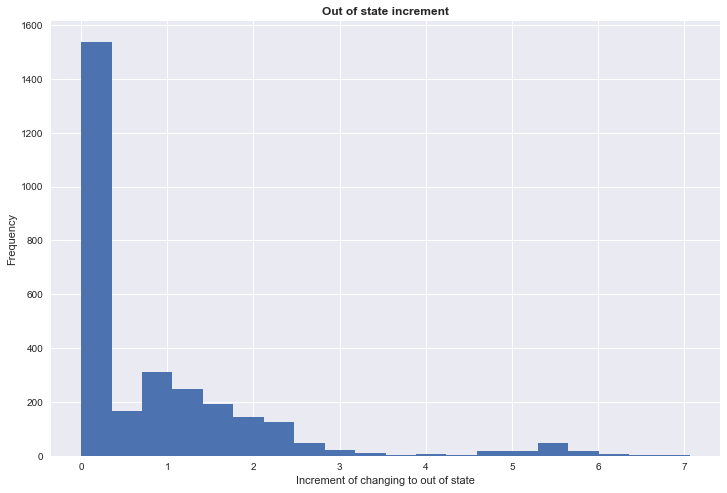

In [101]:
plot_hist(ios, 20, 'Increment of changing to out of state', 'Frequency', 'Out of state increment')

Most universities charge the same amount in state and out of state, we can see this because on the graph most of the values or increments in changing to an out of state modality is zero.

## Predictive Analysis

For the predictive analysis, we will try to create a regression model to predict the price of tuition over the next years, this could also help to determine if its worth it and it willl be worth it to get a college degree.

### Data Preparation and Split

For the first part of the model, we need to define the variables and columns to use in the model, as well as splitting the information in the training and testing parts. The DataFrame below shows that data that will be used in the model, the input variable or the independent variable will be the year and the output variable or dependet variable will be the tuition cost. In other words, we will feed the model information so that after we can produce the tuition cost using the year as the input.

In [102]:
# Data for the regression model
regresion_data = tuition_grow.iloc[2:,[1, 3]]
regresion_data.tail()

,year,tuition_cost
84,2012,21222
90,2013,21682
96,2014,22278
102,2015,22852
108,2016,23091


In [103]:
# Input and output variables
X = np.array(regresion_data['year']).reshape(-1, 1)
y = np.array(regresion_data['tuition_cost'])

After having our variables defined, we then split them into the testing and training part, in this case, we will take 80% of the information for training and the remaining 20% will be designated to testing. This split will allow us to determine the accuracy of the model and decide if it's good or not.


In [104]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (13, 1) (13,)
Test set: (4, 1) (4,)


In [105]:
def get_metrics(model, x, y, split):
    
    'Function that gets both the MSE and R2 of a given model'
    
    # Predict new values
    y_hat = model.predict(x)
    
    MSE = metrics.mean_squared_error(y, y_hat)
    R2 = metrics.r2_score(y, y_hat)
    
    df = pd.DataFrame(data = {'MSE': [MSE],
                             'R2': [R2]}, index = [split])
    
    return df

### Model #1 (Regression)

In [106]:
# Model creation
regr = LinearRegression(fit_intercept = True)
regr.fit(X_train, y_train) 
print("Coeff and intercept: ", regr.coef_, regr.intercept_)

Coeff and intercept:  [511.52505353] -1007956.3190578157


In [107]:
# Train metrics
get_metrics(regr, X_train, y_train, 'train') 

,MSE,R2
train,15378.405732,0.997878


In [108]:
# Test metrics
get_metrics(regr, X_test, y_test, 'test') 

,MSE,R2
test,45058.968553,0.978502


The metrics don't give us a clear answer on whether the model is good. If we look at the MSE, which in a few words is the average of the square errors, error being the differences between the observed values and the predicted ones, both train and test splits have a high MSE. If we only look at this metric we would say that the model is bad as the error is very high, the differences between the values mentioned is high. 

However, if we switch our focus to the R2, which in basic words is the proportion of the variance in the dependent variable that is predictable from the independent variable, we can see that is high in both cases, almost reaching 100%. This would indicate that the model is good. 

Based on this we can say that the model is usable, the high R2 is a good indicator, but we would need to consider that the model will have a certain amount of error. After all, it's almost impossible to get a completely perfect model.    

In [109]:
# Prediction values vs real values

yhat_test = regr.predict(X_test) # Test predicted values
yhat_train = regr.predict(X_train) # Train predicted values

In [110]:
def plot_real_vs_predicted(X, y, y_hat, tt):
    
    'Function that plots the predicted and the real values of a regression model'
    
    plt.figure(figsize = (12, 8))
    plt.scatter(X, y, label = 'Real value')
    plt.scatter(X, y_hat, label = 'Predicted value')
    plt.legend(loc = 'best')
    plt.title(tt + ' data regression results', fontweight = "bold")
    plt.ylabel('Tuition cost')
    plt.xlabel('Year')
    plt.show()

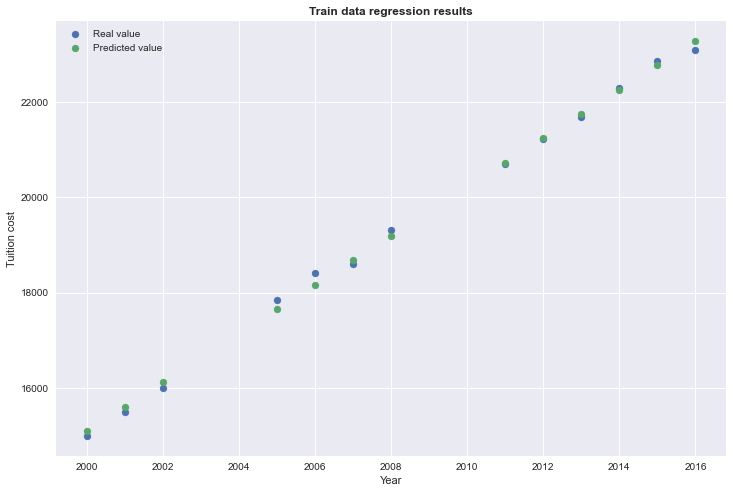

In [111]:
# Plotting the real values and the predicted values for the training part
plot_real_vs_predicted(X_train, y_train, yhat_train, 'Train')

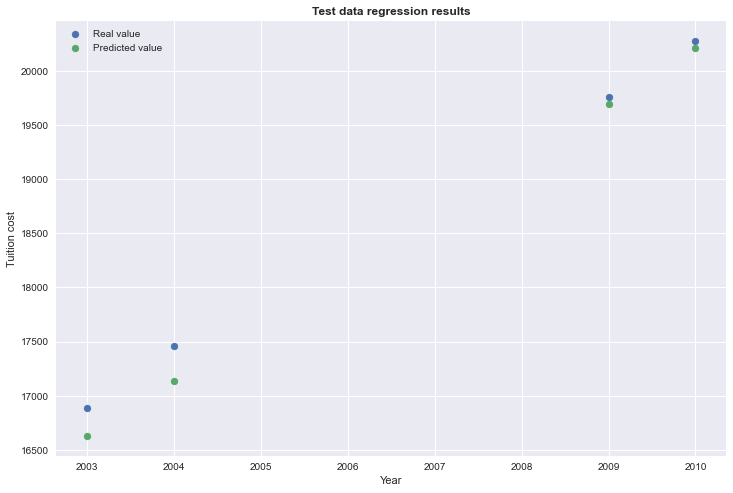

In [112]:
# Plotting the real values and the predicted values for the testing part
plot_real_vs_predicted(X_test, y_test, yhat_test, 'Test')

Both graphs above show the comparison between the predicted values (green) and the real values (blue) every year for both the training and testing data. We can visually see why the error (MSE) is high, the predicted values are a bit far from the real ones in both cases. 

### Model #2 (Regression)

Since the last regression model had a high MSE, we will try to create a new model, this time we will choose another more complicated method which will be a gradient boosting regressor. Our hope is that the results will be much better, having a low MSE and a high R2.

Code from class in Mexico and: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

Quick note, in order to search the optimal parameters, we will run a grid search which will iterate over certain parameters and find the most optimar ones for the data set. The parameters found in the grid search will be used to create the final model.

In [113]:
# Model
model = GradientBoostingRegressor()

# Parameters of the model
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]
n_estimators = [100,500,1000, 1500]
max_depth = [4,6,8,10]
                 
# Define grid search

grid = dict(learning_rate = learning_rate, subsample = subsample, n_estimators = n_estimators, max_depth = max_depth)

# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 2, n_jobs=-1)
    #grid_GBR.fit(X_train, y_train)

#cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs =-1, cv = 2)
grid_result = grid_search.fit(X_train, y_train)


## Code both from previous work in México and: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

In [114]:
# Results from grid seaarch or parameters to use in the model
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_result.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=1000,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9675826558411742

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.5}


In [115]:
# Model creation
reg2 = grid_result.best_estimator_
reg2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=1000,
                          subsample=0.5)

In [116]:
# Model 2 metrics for the training part
get_metrics(reg2, X_train, y_train, 'train')

,MSE,R2
train,0.024371,1.0


In [117]:
# Model 2 metric for the testing part
get_metrics(reg2, X_test, y_test, 'test')

,MSE,R2
test,213772.773824,0.898007


The results show that this might be a much better model that the previous one, the MSE is not that high this time, especially for the training part, and although the R2 is a bit lower in the testing part it's still high enough to consider this model as valid. Since the metrics are better, **this would be our final model to predict the price of tuition over the next years to determine if the tuition of universities will get even more expensive.**

In [118]:
# Prediction values vs real values
yhat_train2 = reg2.predict(X_train)
yhat_test2 = reg2.predict(X_test)

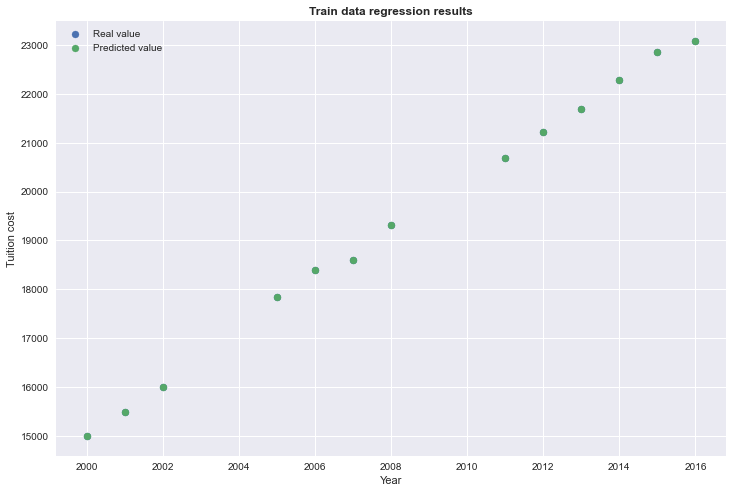

In [119]:
# Plotting the real values and the predicted values for the training part
plot_real_vs_predicted(X_train, y_train, yhat_train2, 'Train')

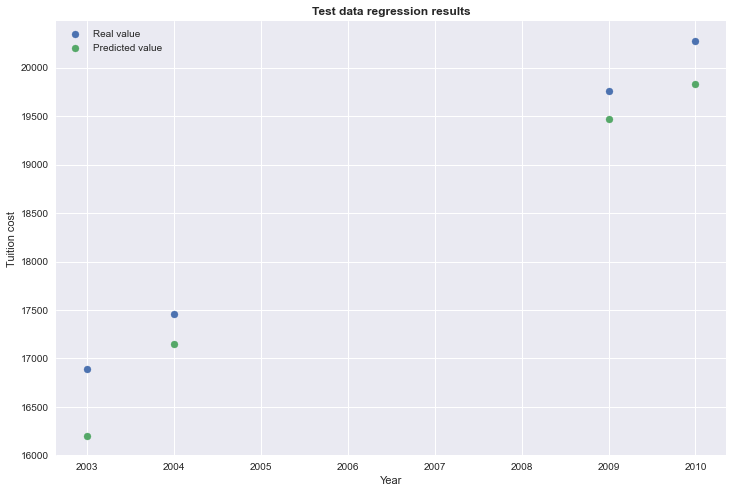

In [120]:
# Plotting the real values and the predicted values for the testing part
plot_real_vs_predicted(X_test, y_test, yhat_test2, 'Test')

The first figure graph shows why the MSE is so low in the testing part, all of the predicted values are practically on top or the same as the real ones and the R2 is also almost perfect. Things change when we look at the testing part, the MSE get very high once again and the R2 is not as perfect as the training, but both metrics are still acceptable. 

## Summary

Now that we have answered all the questions, created new variables and trained a regression model, we can answer the main question proposed at the start of the notebook, is going to university worth it? In order to solve this main question, we created a couple of secondary/support questions to further analyze the problem. Since the start of the analysis, we have seen interesting behaviors and have made several conclusions, these are the main ones:

- Even though the tuition cost is growing each year, the changes in the rates are not very exaggerated, averaging an increase of 2.74% per year and having increased 53.99% in 16 years.
- Tuition tends to change/grow in a higher percentage than the yearly wages, meaning college gets more expensive and wages do not match this increase.
- Tuition in private universities is considerable higher than in public ones.
- Unlike tuition, the difference between salaries in a private and public university is very little, both for early and mid-career.
- The rank of the university matters when it comes to potential salary.
- In general, paying more in tuition will increase the chance of getting paid more.
- In general, the higher the rank of the university, the higher the tuition will be. 
99% of universities give scholarships along all income brackets and, in general, your income bracket will barely affect the change of getting a scholarship.
- Studying a 4-year degree will cost you more than a 2-year one, while the potential salary is similar for both cases.
- In most cases, you need between 1.5 to 4 years to recover the money spent on tuition.

According to the previous conclusions, we would say **it is worth it, attending to a university to get a degree.** Even though tuition is growing at a faster rate than wages, a quick example down below shows that not attending university means missing out on getting a certain amount of money throughout your life:



In [121]:
# Earnings in 35 years not attending university
salary_no_uni = average_salary_US.iloc[-1,1] * 35
salary_no_uni

2319100

In [122]:
# Earnings in 35 years attending university
salary_uni = salary_potential_data.iloc[:,3].mean() * 10 + salary_potential_data.iloc[:,4].mean() * 25
salary_uni

2833741.1764705884

In [123]:
# Difference and consideration of a 4 year degree
salary_uni - salary_no_uni - tuition_cost_data3.iloc[:,7].mean() * 4

407205.13003835897

The first figure graph shows why the MSE is so low in the testing part, all of the predicted values are practically on top or the same as the real ones and the R2 is also almost perfect. Things change when we look at the testing part, the MSE get very high once again and the R2 is not as perfect as the training, but both metrics are still acceptable. 

This last number is an important one, it means that if you don't invest in a college degree, you will be missing out on the opportunity to earn $400,000 more in your life. Furthermore, the fact that you get your money back in no more than 5 years is also a good indicator that college is a good idea. This little example considers the average total tuition. 

As we mentioned before, almost all universities grant scholarships, studying in a public school is cheaper and grants almost the same salary, and you have the option to study for just 2 years paying even less. This brings the cost of tuition down and the potential earnings could be higher. Also, if you go to a top-ranked university, even though you pay more, you get the opportunity to earn even more, once again increasing the potential earnings of going to university rather than not.

The earnings you miss out on if you don't attend university are high, meaning the gap in total earnings with and without university is high. As we saw before, over the next years tuition might still grow at a faster rate than wages, but as long as the gap is big enough, university will be worth it. Tuition can change drastically, but you might still be missing out on a substantial amount of money in your life. The problem comes when the gap closes and there is no real advantage in total earnings if you attend university.

Our work is far from perfect, code can be cleaner and more insights, analysis and models can be created with the information we have. Here we list a few of the strengths and weaknesses as well as possibilities of our work.

Strengths:

- Insightful conclusions
- The datasets are already clean, models and further analysis can be done easily
- Our regression model had a decent performance, it could be use to predict tuition costs

Weaknesses:

- Even though the model was good, we could try to get a better performance
- The information fed to the model was not that much, we didn't have enough data as input for the model
- We only have data of the US, adding more countries could make our work much better
- We assumed the average wage as wage without college, in order to have a better result, we will need to find data on average wages of people without a university degree
Possible thing to do:

Possible future:
- Make another model that predicts wages, compare it to the tuition model in the future and see the behavior
Possibility of creating a classification model

